# Dados do Metrô

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

In [2]:
metro = gpd.read_file('data/Transporte/Metro/Estacoes_Metro.geojson')

In [3]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [4]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [6]:
rj = gpd.read_file('data/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('data/Mapas/RJ-DATASET/DATASET.shp')

# Agregando Outros Tipos de Transporte

# Estações de Trem

In [7]:
trem = gpd.read_file('data/Transporte/Trem/Estacoes_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

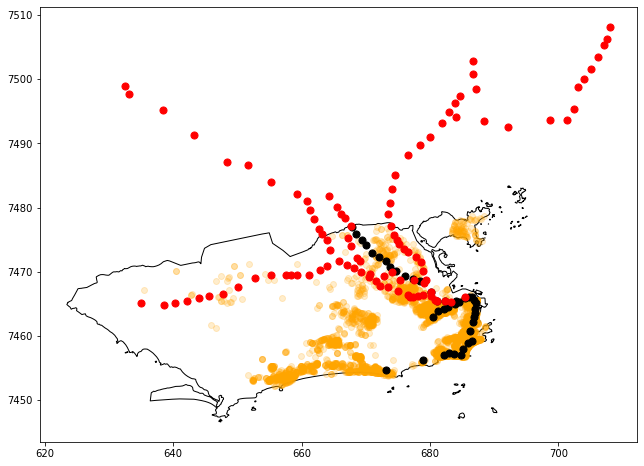

In [8]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

In [9]:
trem = trem[trem.within(rj.iloc[0].geometry)]

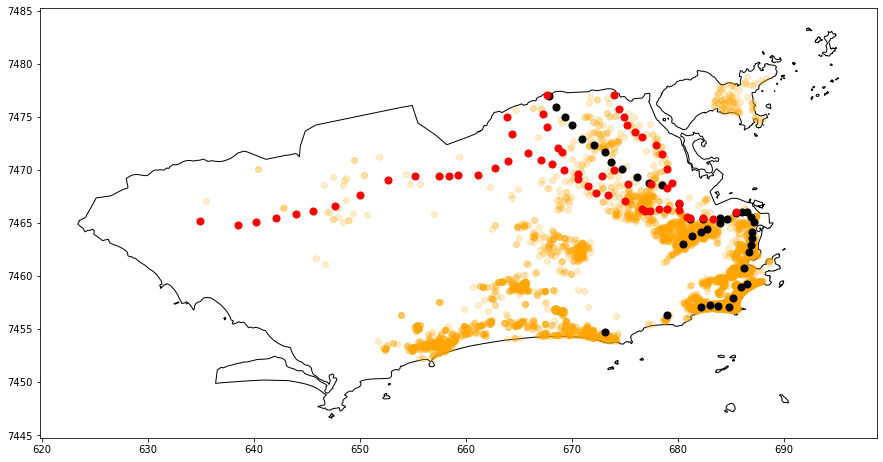

In [10]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

# Estações BRT

In [11]:
brt = gpd.read_file('data/Transporte/BRT/Estacoes_BRT.geojson')


In [12]:
brt.head()

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25244 -22.85513)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.24383 -22.84709)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25824 -22.85743)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27706 -22.84158)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27666 -22.84205)


In [13]:
brt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [16]:
brt.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

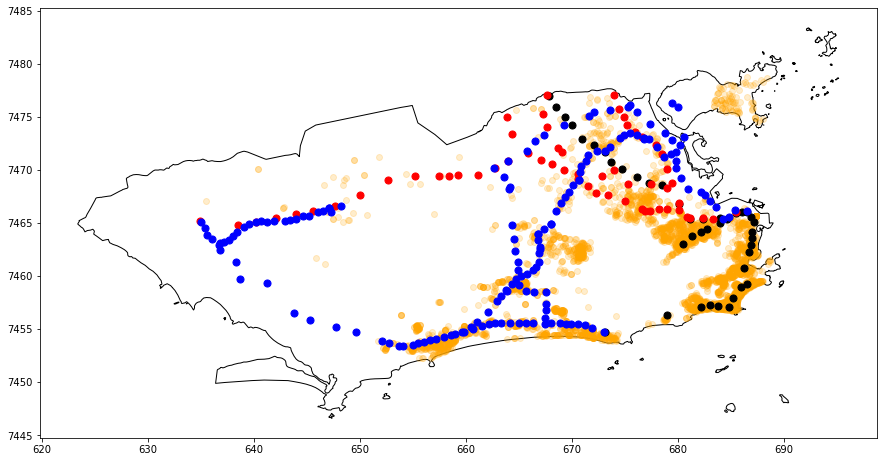

In [17]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
brt.plot(ax=base, color='blue', markersize= 50)

In [18]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index = True)

In [19]:
type(transporte)

geopandas.geoseries.GeoSeries

In [20]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [21]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440),0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284),0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574),0.214605


In [22]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [23]:
geo_dados.to_file('data/Mapas/RJ-DATASET/DATASET.shp')

/home/yorinori/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
<ipython-input-23-9efd4b6ef723>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_dados.to_file('data/Mapas/RJ-DATASET/DATASET.shp')
